## Alireza Farajtabrizi (97102185) Lab 7


### Import Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## LBP Filter

### Loading Image

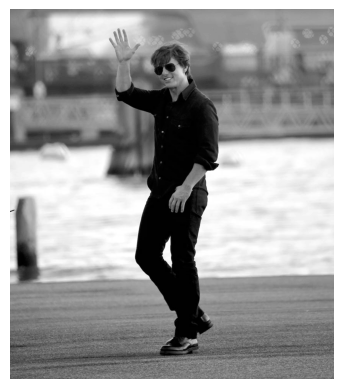

In [2]:
img = cv2.cvtColor( cv2.imread('image.jpg'), cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Plotting and Appying Filter

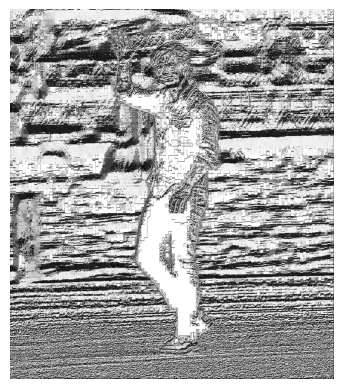

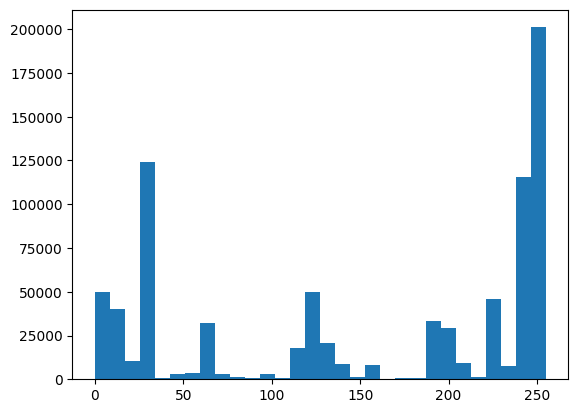

In [3]:
from skimage.feature import local_binary_pattern

# using a built-in filter
img_LBP = local_binary_pattern(img, 8, 1)

#plotting the result
plt.imshow(img_LBP, cmap='gray')
plt.axis('off')
plt.show()

# plotting the feature histogram
plt.hist(np.ravel(img_LBP), bins = 30)
plt.show()

## Gabor

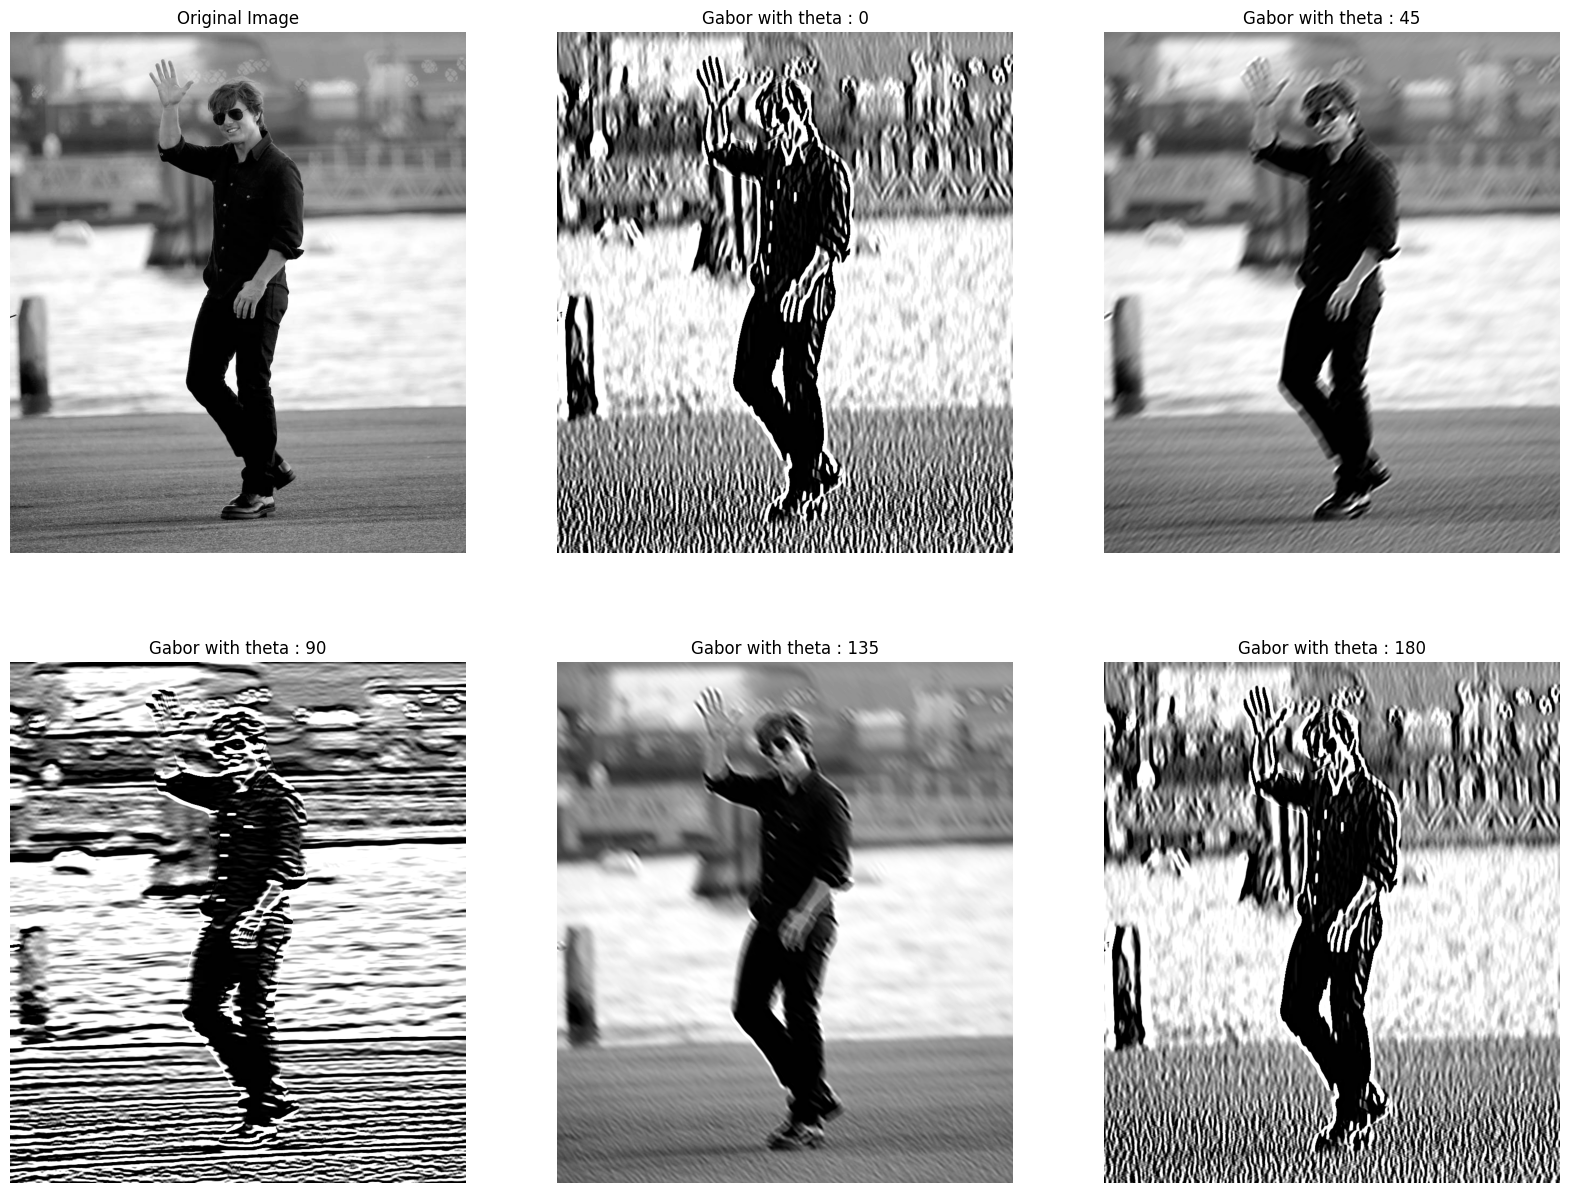

In [4]:
from cv2 import getGaborKernel as gabor

plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original Image")
 
 
thetas = [0, 45, 90, 135, 180]
i = 2



for theta_d in thetas:
    theta = theta_d / 180.0 * np.pi
    kernel = gabor((15,15), sigma = 4.0, theta = theta, lambd = 10.0, gamma = 0.5, psi = 0)
    kernel = kernel/(kernel.sum())
    
    plt.subplot(2,3,i)
    plt.imshow(cv2.filter2D(src=img, ddepth = -1, kernel=kernel),cmap='gray')
    plt.title("Gabor with theta : "+str(theta_d))
    plt.axis('off')
    i+=1
plt.show()

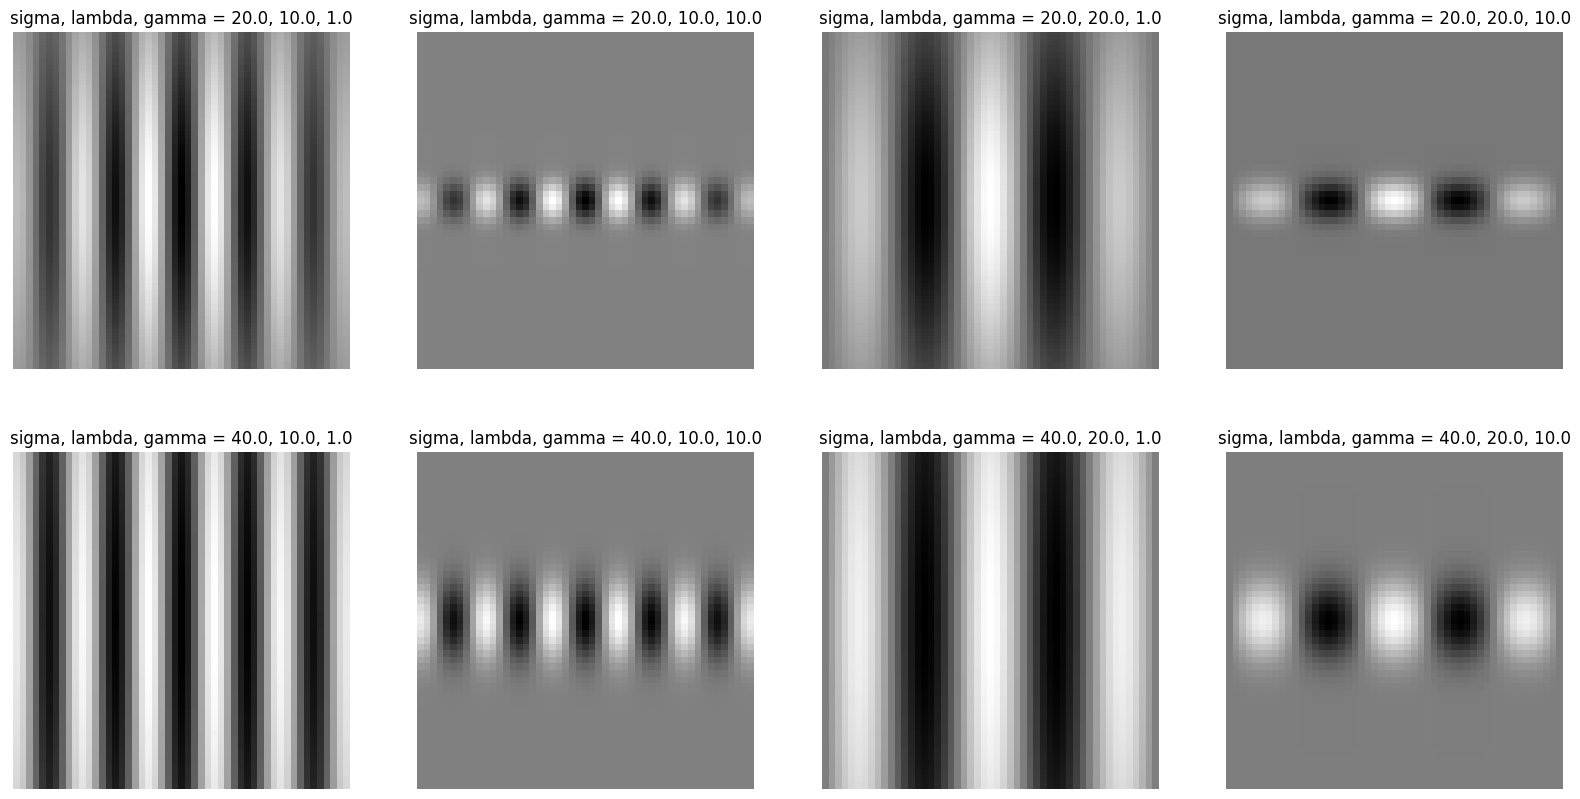

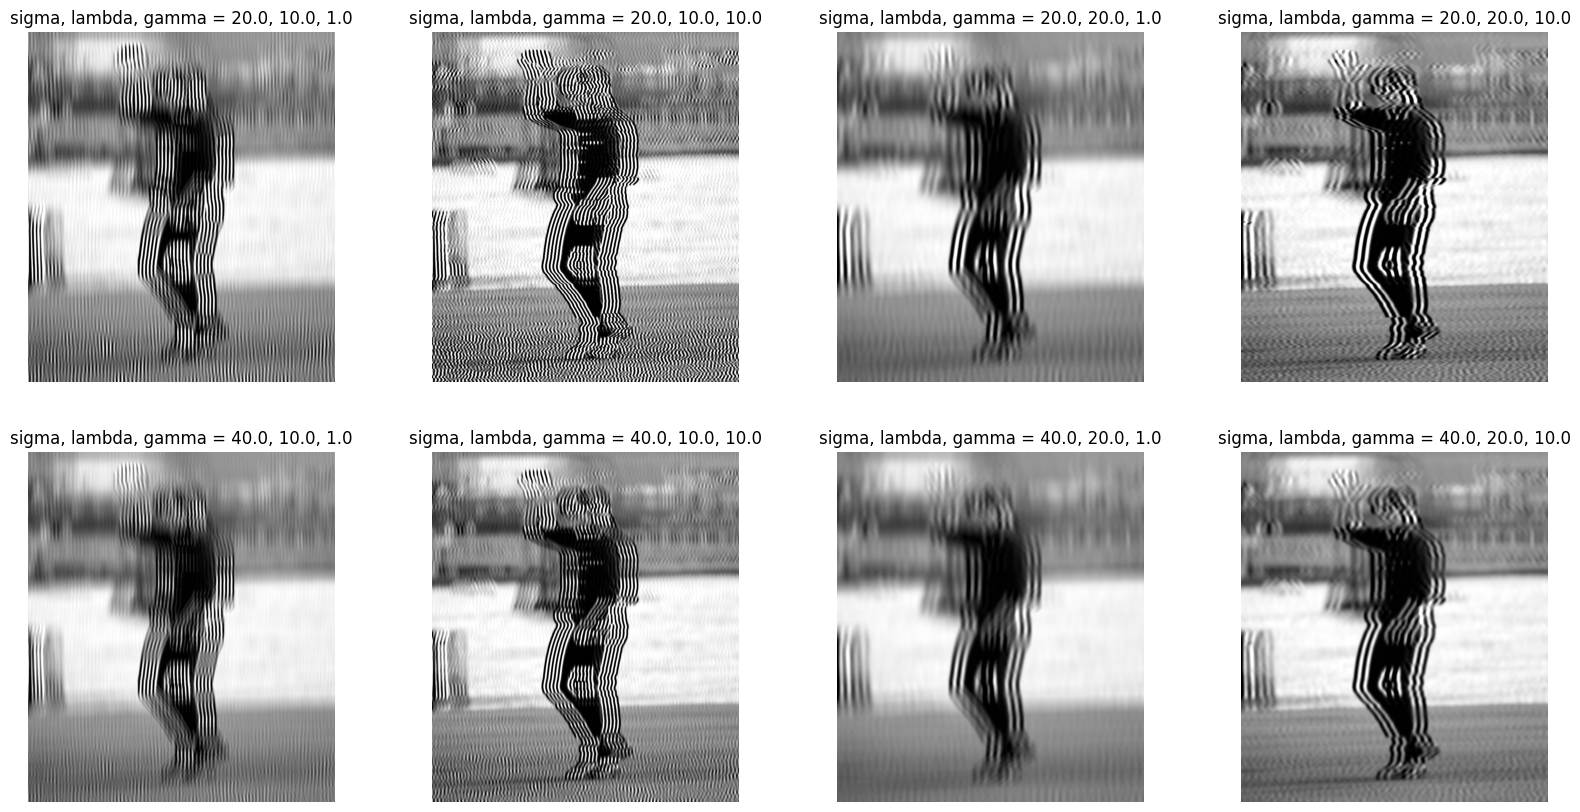

In [5]:
from cv2 import getGaborKernel as gabor

theta = 0
i = 1
plt.figure(figsize=(20,10))
for sigma in [20.0, 40.0]:
    for lambd in [10.0, 20.0]:
        for gamma in [1.0, 10.0]:
            kernel = gabor((50,50), sigma = sigma, theta = theta, lambd = lambd, gamma = gamma, psi = 0)
            kernel = kernel/(kernel.sum())
            
            plt.subplot(2,4,i)
            plt.imshow(kernel, cmap='gray')
            plt.title("sigma, lambda, gamma = "+str(sigma)+", "+str(lambd)+", "+str(gamma))
            plt.axis('off')
            i+=1
plt.show()  

i = 1
plt.figure(figsize=(20,10))
for sigma in [20.0, 40.0]:
    for lambd in [10.0, 20.0]:
        for gamma in [1.0, 10.0]:
            kernel = gabor((50,50), sigma = sigma, theta = theta, lambd = lambd, gamma = gamma, psi = 0)
            kernel = kernel/(kernel.sum())
            
            plt.subplot(2,4,i)
            plt.imshow(cv2.filter2D(src=img, ddepth = -1, kernel=kernel),cmap='gray') 
            plt.title("sigma, lambda, gamma = "+str(sigma)+", "+str(lambd)+", "+str(gamma))
            plt.axis('off')
            i+=1
plt.show()         

تاثیر لاندا یا همان طول موج بیشتر به صورت تار شدن خود را نشان می دهد و افزایش لاندا تعداد خطوط را در فیلتر بیشتر می کند و خود تصویر را محو می کند. برای مقایسه در تصاویر بالا باید تصویر ستون کا ام را با تصویر کا به اضافه دو مقایسه کنید

تاثیر سیگما یا همان انحراف معیار در فیلتر به صورت میزان بزرگی فیلتر خود را نشان می دهد و هرچی این عدد نسبت به سایز کرنل کوچک تر باشد اثر فیلتر در مرکزش متمرکزتر است. اثر این پارامتر بر خود تصویر نیز این گونه است که هرچه بزرکتر است اثرش محو تر است و هرچه کوچکتر باشد انگار تکستچر شارپ تری داریم. هر تصاویر بالا هر تصویر را با زیری خود مقایسه کنید

اثر گاما نیز تاثیر فیلتر در دو جهت را کنترل می کند و هر چه مقدارش از یک دور باشد به سمت ایکس یا وای متمایل می شود

## HOG

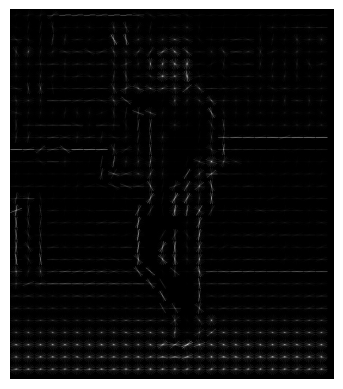

In [6]:
from skimage.feature import hog
from skimage import data, exposure

img_hog = hog(img, pixels_per_cell=(32,32), cells_per_block=(2, 2), visualize=True)[1]
img_hog_rescaled = exposure.rescale_intensity(img_hog, in_range=(0, 10))

plt.figure()
plt.imshow(img_hog_rescaled, cmap='gray')
plt.axis('off')
plt.show()

اگر سایز سلول را یه 16 در 16 تغییر دهیم کمی جزئیات بیشتری داخل نتیجه می شود 

## HOG + SVM

### Mask

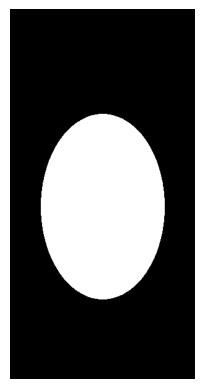

In [7]:
mask = cv2.ellipse(np.zeros((600, 300), np.uint8), (150, 320), (100, 150), 0, 0, 360, 1, -1)

plt.figure()
plt.imshow(mask,cmap = 'gray')
plt.axis('off')
plt.show()

### Spiti Function

In [8]:
from os import listdir
from skimage import io
from sklearn.model_selection import train_test_split

def load_and_split(folder_dir, train_size, label = 0):
    X = []
    for file in listdir(folder_dir):
        img=io.imread(folder_dir+'/'+file,as_gray=True)
        X.append(img)          
    
    y = np.full(len(X), label)
    X = np.array(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size ,random_state=np.random.randint(100))
    return X_train, X_test, y_train, y_test

### Spliting and Pre-Processing

In [9]:
from sklearn.preprocessing import StandardScaler

x_h_train, x_h_test, y_h_train, y_h_test = load_and_split('Happy', 65, 1)
x_d_train, x_d_test, y_d_train, y_d_test = load_and_split('Disgust', 35, 2)

x_train = np.concatenate((x_h_train, x_d_train), axis = 0)
x_test  = np.concatenate((x_h_test, x_d_test), axis = 0)
y_train = np.concatenate((y_h_train, y_d_train))
y_test  = np.concatenate((y_h_test, y_d_test))

x_train_hog = []
for i in range(len(x_train)):
    image, img_hog = hog(x_train[i, :, :], pixels_per_cell = (16,16), cells_per_block=(2, 2), visualize=True)
    x_train_hog.append(image)
    img_hog_rescaled = exposure.rescale_intensity(img_hog, in_range=(0, 10))
    
x_train_hog = np.array(x_train_hog)

x_test_hog = []
for i in range(len(x_test)):
    image, img_hog = hog(x_test[i, :, :], pixels_per_cell = (16,16), cells_per_block=(2, 2), visualize=True)
    x_test_hog.append(image)
    img_hog_rescaled = exposure.rescale_intensity(img_hog, in_range=(0, 10))

x_test_hog = np.array(x_test_hog)

scaler = StandardScaler()
scaler.fit(x_train_hog)
x_train_hog = scaler.transform(x_train_hog)

scaler.fit(x_test_hog)
x_test_hog = scaler.transform(x_test_hog)

### Grid Search

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel = 'rbf')

C_range = np.logspace(-8, 2, 11)
gamma_range = np.logspace(-5, 5, 11)
param_grid = dict(gamma=gamma_range, C=C_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x_train_hog, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 10.0, 'gamma': 1e-05} with a score of 0.97


### Training with Best Hyper-Parameters

In [11]:
from sklearn.pipeline import make_pipeline
C, gamma = grid.best_params_['C'], grid.best_params_['gamma']

clf = SVC(C=C, gamma=gamma)
clf.fit(x_train_hog, y_train)

y_train_p= clf.predict(x_train_hog)
y_test_p= clf.predict(x_test_hog)

### Evaluation

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

print("Confusion Matrix for train : \n" , confusion_matrix(y_train, y_train_p))
print("Confusion Matrix for test : \n" , confusion_matrix(y_test, y_test_p))

persicion_train = precision_recall_fscore_support(y_train, y_train_p)[0]
recall_train = precision_recall_fscore_support(y_train, y_train_p)[1]
persicion_test = precision_recall_fscore_support(y_test, y_test_p)[0]
recall_test = precision_recall_fscore_support(y_test, y_test_p)[1]

print("Persicion of train for each class : \t", persicion_train , "\tand on average : \t" , np.mean(persicion_train))
print("Persicion of test for each class : \t", persicion_test ,"\tand on average : \t" , np.mean(persicion_test))
print("Recall of train for each class : \t", recall_train,"\tand on average : \t" , np.mean(recall_train))
print("Recall of test for each class : \t", recall_test,"\tand on average : \t" , np.mean(recall_test))

Confusion Matrix for train : 
 [[65  0]
 [ 0 35]]
Confusion Matrix for test : 
 [[20  0]
 [ 1 11]]
Persicion of train for each class : 	 [1. 1.] 	and on average : 	 1.0
Persicion of test for each class : 	 [0.95238095 1.        ] 	and on average : 	 0.9761904761904762
Recall of train for each class : 	 [1. 1.] 	and on average : 	 1.0
Recall of test for each class : 	 [1.         0.91666667] 	and on average : 	 0.9583333333333333


 خب همون طور که مشاهده می کنید به دلیل انتخاب پارامتر های خوب به کمک گرید سرچ دقت بسیار بالاست و بعضی مواقع حتی 100 درصد هم می شود که این بخاطر شانس خوبمان هنگام جدا کردن ترین و تست است.